<a href="https://colab.research.google.com/github/Snehashis22/SkimLit/blob/main/SkimLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

# SKIMLIT

The purpose of building this model is to make readings medical abstract easier

In [ ]:
!nvidia-smi

Sat Aug 17 15:54:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Get data

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 17.87 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
#check what files are in the PubMed_20k dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [ ]:
#start our experiment using 20k dataset with numbers replaced by '@' sign
data_dir="/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
#check all the file names in target directory
import os
filenames=[data_dir+filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

## preprocess data
Now we got some text data, its time to become one with it.
And one of the best ways to become one with the data is to..
> visualize,visualize,visualize

Lets write a function to read in all of the lines of a target text file

In [ ]:
#create a function to read the lines of a document
def get_lines(filename):
  """
  Reads filename(a text file name) and return the lines of text as a list.
  ARGS:
    filename: a string containing the target filepath
  Returns:
    A list of strings with one string per line from the target filename.
  """

  with open(filename,'r') as f:
    return f.readlines()

In [ ]:
#lets read in the training lines
train_lines=get_lines(data_dir+"train.txt") #read the lines from training file
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

How i think our data would be best represented..

'''

[{'line_number':0,

  'target':'BACKGROUND',

  'text':"Emotional eating is associated with overeating and the development of obesity .\n",

  'total_lines':11},
  
  ...]
  
'''

### Lets write a function which turns our datasets into the above format

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """
  Returns a list of dictionaries of abstract line data.
  Takes in filename, reads it content and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence
  number the target line is.
  """
  input_lines=get_lines(filename) #get all lines from filename
  abstract_line=""#create an empty abstract
  abstract_samples=[]#create an empty list of abstracts
  # loop through each line in a target file
  for line in input_lines:
    if line.startswith("###"): #check to see if it is an ID line
      abstract_id=line
      abstract_lines="" #reset the abstract string if the line is an ID line because it saves all lines of one particular abstract
    elif line.isspace(): #check to see if line is newline
      abstract_line_split=abstract_lines.splitlines() #split abstract into separate lines
      #Iterate through each line in a single abstract and count them at the same time.
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data={}#create an empty dictionary for each line
        target_text_split=abstract_line.split("\t") #split target label from text
        line_data["line_number"]=abstract_line_number #what number does the line appear in
        line_data["target"]=target_text_split[0] #get target label for eg 'OBJECTIVE' will be at 0th index and the sentence following it will be at 1st index.
        line_data["text"]=target_text_split[1].lower()
        line_data["total_lines"]= len(abstract_line_split)-1 #how mane total lines are there in the target abstract?(start from 0)
        abstract_samples.append(line_data) #add line data to abstract samples list
    else: #if the above conditions are not fulfilled, the line contains a labelled sentence
      abstract_lines+=line
  return abstract_samples


In [ ]:
#get data from file and preprocess it
%%time
train_samples=preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples=preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples=preprocess_text_with_line_numbers(data_dir+"test.txt")
print(len(train_samples),len(val_samples),len(test_samples))

180040 30212 30135
CPU times: user 471 ms, sys: 105 ms, total: 576 ms
Wall time: 777 ms


In [ ]:
#check the first abstract of our training data
train_samples[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

Now that our data is in the format of list and dictionaries, how about we turn it into DF to further visualize it

In [ ]:
import pandas as pd
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)
train_df.head(14)

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11
5,5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",11
6,6,RESULTS,there was a clinically relevant reduction in t...,11
7,7,RESULTS,the mean difference between treatment arms ( @...,11
8,8,RESULTS,"further , there was a clinically relevant redu...",11
9,9,RESULTS,these differences remained significant at @ we...,11


In [ ]:
#distribution of labels
train_df.target.value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


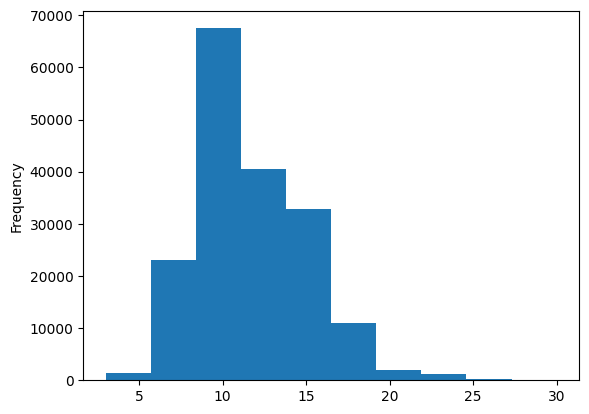

In [ ]:
#lets check the length of diff lines
train_df.total_lines.plot.hist();

##Get list of sentences

In [ ]:
#convert abstract text lines into lists
train_sentences=train_df["text"].tolist()
val_sentences=val_df["text"].tolist()
test_sentences=test_df["text"].tolist()
len(train_sentences),len(val_sentences),len(test_sentences)

(180040, 30212, 30135)

In [ ]:
#view first few lines of training sentences
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## make numeric labels(ML models require numeric labels)



##One hot encoding


#one hot encoding
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=True) #we want a non sparse matrix
train_labels_one_hot=one_hot_encoder.fit_transform(train_df["target"].to_numpy())
#check what one hot encoded labels look like
train_labels_one_hot

In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False) #we want a non sparse matrix as tf is incompatible with saprse matrix
train_labels_one_hot=one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot=one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot=one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1,1))
#check what one hot encoded labels look like
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
import tensorflow as tf
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

## Label encode labels

In [ ]:
#extract labels ("target" columns) and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_label_encoded=label_encoder.fit_transform(train_df["target"].to_numpy())
val_label_encoded=label_encoder.transform(val_df["target"].to_numpy()) #because already fitted in train so we can reuse same we can do in one hot encoder
test_label_encoded=label_encoder.transform(test_df["target"].to_numpy())
#check what training labels look like
train_label_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
#get class names and number of classes from labelencoder instance
num_classes=len(label_encoder.classes_)
class_names=label_encoder.classes_
num_classes,class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## starting a series of modelling experiments...
 As usual we are going to be trying a bunch of different models and see which one works best.


## Model 0: getting a baseline(tf-idf multinomial naive bayes baseline)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
#create a pipeline
model_0=Pipeline([
    ("tf-idf",TfidfVectorizer()),
    ("clf",MultinomialNB()),
])
#fit the pipeline to the training data
model_0.fit(X=train_sentences,
            y=train_label_encoded) #as multinomial nb cannot handle one hot labels

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
#evaluate baseline model on validation dataset
model_0.score(X=val_sentences,y=val_label_encoded)

0.7218323844829869

In [ ]:
#make prediction using our baseline model
baseline_preds=model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
#create a function to esmitate results
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
#calculate baseline results
baseline_results=calculate_results(y_true=val_label_encoded,y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## preparing our data (text) for deep sequence model
Before we start building deeper models, we have got to create vectorization and embedding layers

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers


In [ ]:
#how long is each sentence on average
sent_lens=[len(sentence.split()) for sentence in train_sentences]
avg_sent_lens=np.mean(sent_lens)
avg_sent_lens


26.338269273494777

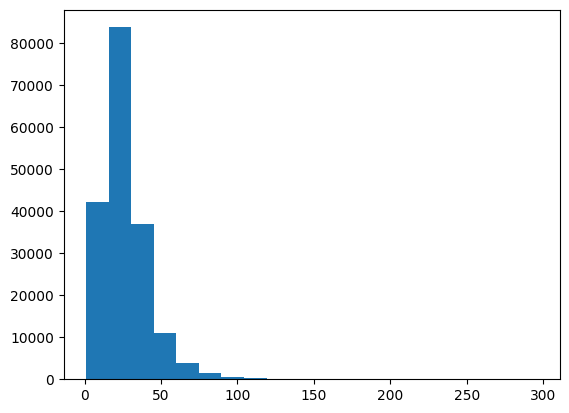

In [ ]:
#what the distribution look like
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=20);

In [ ]:
#how long of sentence length covers 95% of examples?
output_seq_len=int(np.percentile(sent_lens,95))
output_seq_len

55

In [ ]:
#maximum sequence length in training set
max(sent_lens)

296

### Create text vectorizer layer
We make a layer which maps our text to number

In [ ]:
#how many words are in our vocabulary? From the paper its 68k
max_tokens=68000

In [ ]:
#create text vectorizer
from tensorflow.keras.layers import TextVectorization
text_vectorizer=TextVectorization(max_tokens=max_tokens,#no of words in vocabulary
                                  output_sequence_length=output_seq_len) #desired output length of vectorization sequence

In [ ]:
#adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [ ]:
#test out text vectorizer on random sentences
import random
target_sentence=random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text:{len(target_sentence.split())}")
print(f"\nVectorized text:{text_vectorizer([target_sentence])}")

Text:
this study was conducted to investigate the effects of reinsertion of the stylet after a spinal anesthesia procedure on the post dural puncture headache ( pdph ) methods : we have enrolled into this study @ patients who were undergoing elective operations with spinal anesthesia and randomized them to group a ( stylet replacement before needle removal ) and group b ( needle removal without stylet replacement ) .

Length of text:69

Vectorized text:[[   23    17    10   198     6   331     2    71     4 28836     4     2
   9549    21     8   841   435   407    18     2   624  7712  2704  1309
  13083   578    43    99   230   143    23    17    12    67     9   295
   1074  3473     7   841   435     3    29   942     6    13     8  9549
   1075   129  1347  1279     3    13   186]]


In [ ]:
#how many words in training vocabulary
rct_20k_text_vocab=text_vectorizer.get_vocabulary()
print(f"Number of words in vocab:{len(rct_20k_text_vocab)}")
print(f"Most common words in the vocab:{rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocab:{rct_20k_text_vocab[-5:]}")

Number of words in vocab:64841
Most common words in the vocab:['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocab:['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
#get config of text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### create custom text embeddings

In [ ]:
#create token embedding layer
token_embed=layers.Embedding(input_dim=len(rct_20k_text_vocab), #length of vocabulary
                             output_dim=128, #Note: different embedding sizes result in drastically different number of parameters to be trained
                             mask_zero=True, #use masking to handle variable sequence lenghts(save space)
                             name="token_embedding")

In [ ]:
#show example embedding
print(f"Sentence before vectorization:\n{target_sentence}")
vectorized_sentence=text_vectorizer([target_sentence])
print(f"\nSentence after vectorization but before embedding:\n{vectorized_sentence}")
embed_sentence=token_embed(vectorized_sentence)
print(f"\nSentence after embedding:\n{embed_sentence}\n")
print(f"Embed sentence shape: {embed_sentence.shape}")

Sentence before vectorization:
this study was conducted to investigate the effects of reinsertion of the stylet after a spinal anesthesia procedure on the post dural puncture headache ( pdph ) methods : we have enrolled into this study @ patients who were undergoing elective operations with spinal anesthesia and randomized them to group a ( stylet replacement before needle removal ) and group b ( needle removal without stylet replacement ) .

Sentence after vectorization but before embedding:
[[   23    17    10   198     6   331     2    71     4 28836     4     2
   9549    21     8   841   435   407    18     2   624  7712  2704  1309
  13083   578    43    99   230   143    23    17    12    67     9   295
   1074  3473     7   841   435     3    29   942     6    13     8  9549
   1075   129  1347  1279     3    13   186]]

Sentence after embedding:
[[[ 0.01211027 -0.0134387  -0.02753959 ...  0.04145693 -0.01038382
   -0.03324367]
  [-0.01508526 -0.03407785 -0.01631428 ...  0.0216

## creating datasets(making sure our data loads as fast as possible)
we are going to setup our data to run as fast as possible with the TensorFlow tf.data API

In [ ]:
# Turn our data into tensorflow datasets
train_datasets= tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
val_datasets= tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_datasets= tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))
train_datasets

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
len(train_datasets)

180040

In [ ]:
train_labels_one_hot.shape

(180040, 5)

In [ ]:
#take the tensorslice datasets and turn them into prefetched datasets
train_datasets=train_datasets.batch(32).prefetch(tf.data.AUTOTUNE) #autotune means automatically prefetch as many samples as you can
val_datasets=val_datasets.batch(32).prefetch(tf.data.AUTOTUNE)
test_datasets=test_datasets.batch(32).prefetch(tf.data.AUTOTUNE)
#these steps helps in faster data loading to model
train_datasets

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

### Model1: conv1d with toek embeddings

In [ ]:
inputs=layers.Input(shape=(1,), dtype=tf.string)
text_vectors=text_vectorizer(inputs) #vectorize inputs
token_embeddings=token_embed(text_vectors) #create embedding
x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x) #condense the output of our feature vector from conv layer
outputs=layers.Dense(num_classes, activation="softmax")(x)
model1=tf.keras.Model(inputs,outputs)

#compile
model1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [ ]:
len(train_datasets)

5627

In [ ]:
5627*32

180064

In [ ]:
#fit the model
history_model_1=model1.fit(train_datasets,
                           steps_per_epoch=int(0.2*len(train_datasets)),
                           epochs=3,
                           validation_data=val_datasets,
                           validation_steps=int(0.2*len(val_datasets))) #only validate on 20% of the batches

Epoch 1/3
1125/1125 [==============================] - 27s 21ms/step - loss: 0.7845 - accuracy: 0.6990 - val_loss: 0.6298 - val_accuracy: 0.7693
Epoch 2/3
1125/1125 [==============================] - 9s 8ms/step - loss: 0.6042 - accuracy: 0.7812 - val_loss: 0.5715 - val_accuracy: 0.7941
Epoch 3/3
1125/1125 [==============================] - 9s 8ms/step - loss: 0.5867 - accuracy: 0.7922 - val_loss: 0.5465 - val_accuracy: 0.8062


In [ ]:
#evaluate on whole validation datasets
model1.evaluate(val_datasets)

945/945 [==============================] - 3s 3ms/step - loss: 0.5519 - accuracy: 0.8034


[0.5518692135810852, 0.8033893704414368]

In [ ]:
#make predictions (our model predicts prediction probability for each class)
model_1_pred_probs=model1.predict(val_datasets)
model_1_pred_probs,model_1_pred_probs.shape

945/945 [==============================] - 3s 3ms/step


(array([[5.7626081e-01, 1.8930742e-01, 2.9032139e-02, 1.5571927e-01,
         4.9680360e-02],
        [5.7721150e-01, 1.8556495e-01, 1.9363098e-02, 1.8634824e-01,
         3.1512190e-02],
        [2.4127723e-01, 3.7118418e-03, 2.6400917e-04, 7.5472844e-01,
         1.8538185e-05],
        ...,
        [2.4386327e-05, 3.6966466e-04, 2.8013634e-03, 8.8359675e-06,
         9.9679571e-01],
        [2.2475794e-01, 2.6637301e-01, 1.4285871e-01, 1.3029806e-01,
         2.3571232e-01],
        [1.1267412e-01, 8.1864667e-01, 3.8965814e-02, 1.1127235e-02,
         1.8586116e-02]], dtype=float32),
 (30212, 5))

In [ ]:
#convert pred probs to classes
model_1_preds=tf.argmax(model_1_pred_probs,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [ ]:
#calculate model1 results
model_1_results=calculate_results(y_true=val_label_encoded,
                                  y_pred=model_1_preds)
model_1_results

{'accuracy': 80.33893817026348,
 'precision': 0.8031107413299637,
 'recall': 0.8033893817026347,
 'f1': 0.8001369705622182}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 2: feature extraction with pretrained token embeddings
Now lets use pretrained word embeddings from TensorFlow Hub

The paper originally used GloVe embeddings, however we are going to stick with the later created USE pretrained embeddings.

In [ ]:
#download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer=hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2",
                                      trainable=False,
                                      name="universal_sentence_encoder")

In [ ]:
#Test our pretrained embedding on a random sentence
random_train_sentence=random.choice(train_sentences)
print(f"Random sentence:\n {random_train_sentence}")
use_embedded_sentence=tf_hub_embedding_layer([random_train_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]}\n")
print(f"Length of sentence embeddings:{len(use_embedded_sentence[0])}")

Random sentence:
 we aimed to establish whether use of platinum-based primary chemotherapy followed by delayed surgery was an effective and safe alternative treatment regimen .
Sentence after embedding:
[-8.7676488e-02 -3.6273114e-02 -1.8369500e-02 -5.6303456e-02
 -6.6163160e-02 -8.0299482e-02  3.0342417e-02 -5.6873955e-02
  8.5924208e-02  1.0919619e-02  9.0866573e-02 -6.3395180e-02
 -4.7444075e-02  6.8649679e-02  2.3823421e-02 -1.3037812e-03
 -9.2275158e-02  1.7685231e-02 -8.0571629e-02  5.5618219e-02
  2.1224540e-02  7.3145926e-02 -4.7742877e-02  1.0489959e-02
  4.0483292e-02 -4.2632231e-03  4.0183026e-05 -1.9617376e-03
  1.7953642e-02  5.2395057e-02]

Length of sentence embeddings:512


##Model2: Building and fitting an NLP feature extraction model using pretrained embeddings TensorFlow Hub

In [ ]:
inputs = layers.Input(shape=[], dtype=tf.string)
inputs

<KerasTensor: shape=(None,) dtype=string (created by layer 'input_2')>

In [ ]:
train_datasets

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# Define feature extractor model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(5, activation="softmax")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit feature extractor model for 3 epochs
model_2.fit(train_datasets,
            steps_per_epoch=int(0.15 * len(train_datasets)),
            epochs=3,
            validation_data=val_datasets,
            validation_steps=int(0.15 * len(val_datasets)))

Epoch 1/3
844/844 [==============================] - 16s 16ms/step - loss: 0.8693 - accuracy: 0.6676 - val_loss: 0.7647 - val_accuracy: 0.6970
Epoch 2/3
844/844 [==============================] - 11s 14ms/step - loss: 0.7502 - accuracy: 0.7113 - val_loss: 0.7261 - val_accuracy: 0.7152
Epoch 3/3
844/844 [==============================] - 12s 14ms/step - loss: 0.7120 - accuracy: 0.7269 - val_loss: 0.6855 - val_accuracy: 0.7356


In [ ]:
model_2.evaluate(val_datasets)

945/945 [==============================] - 11s 11ms/step - loss: 0.6963 - accuracy: 0.7370


[0.6962928175926208, 0.7369919419288635]

In [ ]:
#make predictions (our model predicts prediction probability for each class)
model_2_pred_probs=model_2.predict(val_datasets)
model_2_pred_probs,model_2_pred_probs.shape

945/945 [==============================] - 10s 11ms/step


(array([[7.0066589e-01, 1.7343202e-01, 1.7486844e-03, 1.1880548e-01,
         5.3478954e-03],
        [4.8617437e-01, 4.0365362e-01, 3.3058401e-03, 1.0516529e-01,
         1.7009136e-03],
        [4.1615155e-01, 4.8510302e-02, 3.5649441e-02, 4.6957374e-01,
         3.0115031e-02],
        ...,
        [2.6348943e-03, 4.7940235e-03, 1.2136391e-01, 8.6391967e-04,
         8.7034321e-01],
        [5.7768496e-03, 2.9371338e-02, 4.5667195e-01, 2.5098480e-03,
         5.0567001e-01],
        [1.1666598e-01, 5.0252622e-01, 3.4528628e-01, 2.1123805e-03,
         3.3409111e-02]], dtype=float32),
 (30212, 5))

In [ ]:
#convert pred probs to classes
model_2_preds=tf.argmax(model_2_pred_probs,axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
#calculate model1 results
model_2_results=calculate_results(y_true=val_label_encoded,
                                  y_pred=model_2_preds)
model_2_results

{'accuracy': 73.69919237389117,
 'precision': 0.7343128987173526,
 'recall': 0.7369919237389116,
 'f1': 0.7335679244872472}

### Model 3: conv1D with character embeddings
Previously we have token level embeddings but we will need to do similar steps with character level embeddings

Token embedding means one word at a time character embedding signifies one character at a time

### Creating character level tokenizer

In [ ]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [ ]:
#make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Text splitting non character level sequence into characters
split_chars(random_train_sentence)

'w e   a i m e d   t o   e s t a b l i s h   w h e t h e r   u s e   o f   p l a t i n u m - b a s e d   p r i m a r y   c h e m o t h e r a p y   f o l l o w e d   b y   d e l a y e d   s u r g e r y   w a s   a n   e f f e c t i v e   a n d   s a f e   a l t e r n a t i v e   t r e a t m e n t   r e g i m e n   .'

In [ ]:
" ".join(list(train_sentences[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
#split sequence level data splits into character level data splits
train_chars=[split_chars(sentence) for sentence in train_sentences]
val_chars=[split_chars(sentence) for sentence in val_sentences]
test_chars=[split_chars(sentence) for sentence in test_sentences]
print(train_chars[:5])

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .', 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .', 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a n 

In [ ]:
#whats the above character length
chars_lens=[len(sentence) for sentence in train_sentences]
mean_char_length=np.mean(chars_lens)
mean_char_length

149.3662574983337

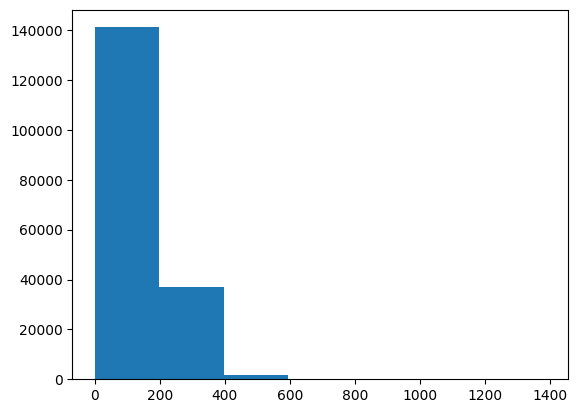

In [ ]:
#check the distribution of our sequences at a character level
import matplotlib.pyplot as plt
plt.hist(chars_lens,bins=7);

In [ ]:
#find what character length covers 95% of sequences
output_seq_char_len=int(np.percentile(chars_lens,95))
output_seq_char_len

290

In [ ]:
# get all keyboard characters
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#create char-level token vectorizer instance
NUM_CHAR_TOKENS=len(alphabet)+2 # add 2 for space and OOV token (OOV means out of vocab,'[UNK]')
char_vectorizer=TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                  output_sequence_length=output_seq_char_len,
                                  standardize="lower_and_strip_punctuation", #default
                                  name="char_vectorizer")


In [ ]:
#Adapt character vectorizer to training character
char_vectorizer.adapt(train_chars)

In [ ]:
# character vocab stats
char_vocab=char_vectorizer.get_vocabulary()
print(f"Number of characters in vocab:{len(char_vocab)}")
print(f"5 Most common characters in the vocab:{char_vocab[:5]}")
print(f"5 Least common characters in the vocab:{char_vocab[-5:]}")

Number of characters in vocab:28
5 Most common characters in the vocab:['', '[UNK]', 'e', 't', 'i']
5 Least common characters in the vocab:['k', 'x', 'z', 'q', 'j']


In [ ]:
# Test out character vectorizer
random_train_chars=random.choice(train_chars)
print(f"Random sentence:\n{random_train_chars}")
print(f"\nLength of random_train_chars:{len(random_train_chars.split())}")
Vectorized_random_sentence=char_vectorizer([random_train_chars])
print(f"\nVectorized random sentence:\n{Vectorized_random_sentence}")
print(f"\nLength of vectorized random sentence:{len(Vectorized_random_sentence[0])}")


Random sentence:
p e e l i n g   i s   a   p r o c e d u r e   w h i c h   a i m s   t o   a c c e l e r a t e   t h e   p r o c e s s   o f   s k i n   e x f o l i a t i o n   .

Length of random_train_chars:68

Vectorized random sentence:
[[14  2  2 12  4  6 18  4  9  5 14  8  7 11  2 10 16  8  2 20 13  4 11 13
   5  4 15  9  3  7  5 11 11  2 12  2  8  5  3  2  3 13  2 14  8  7 11  2
   9  9  7 17  9 23  4  6  2 24 17  7 12  4  5  3  4  7  6  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0

#create a character level embedding

In [ ]:
#create char embedding layer
char_embed=layers.Embedding(input_dim=len(char_vocab), #number of different character
                            output_dim=25, #this is the size of the char embedding in the paper
                            mask_zero=True,
                            name="char_embed")


In [ ]:
#test our character embedding layer
print(f"Charified text:\n{random_train_chars}")
char_embed_example=char_embed(char_vectorizer([random_train_chars]))
print(f"\nEmbedded chars (after vectorization and embedding):\n{char_embed_example}")
print(f"\nEmbedded chars shape:{char_embed_example.shape}")

Charified text:
p e e l i n g   i s   a   p r o c e d u r e   w h i c h   a i m s   t o   a c c e l e r a t e   t h e   p r o c e s s   o f   s k i n   e x f o l i a t i o n   .

Embedded chars (after vectorization and embedding):
[[[ 0.03444356  0.02207134 -0.0150054  ...  0.04447606 -0.00374869
   -0.04341357]
  [-0.03879776  0.01632785 -0.04668285 ... -0.01640047 -0.03754959
   -0.02108699]
  [-0.03879776  0.01632785 -0.04668285 ... -0.01640047 -0.03754959
   -0.02108699]
  ...
  [-0.03605069  0.00160593  0.02026616 ... -0.02976985  0.02279899
   -0.01682669]
  [-0.03605069  0.00160593  0.02026616 ... -0.02976985  0.02279899
   -0.01682669]
  [-0.03605069  0.00160593  0.02026616 ... -0.02976985  0.02279899
   -0.01682669]]]

Embedded chars shape:(1, 290, 25)


### Building a conv1d model to fit on character embedding

In [ ]:
#make conv1d on chars only
inputs=layers.Input(shape=(1,),dtype=tf.string)
char_vectors=char_vectorizer(inputs)
char_embedding=char_embed(char_vectors)
x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(char_embedding)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_Conv1D_char_embeddings")

#compile
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#summary
model_3.summary()

Model: "model_3_Conv1D_char_embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 

In [ ]:
#create char level datasets
train_char_datasets=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_datasets=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_datasets=tf.data.Dataset.from_tensor_slices((test_chars,test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_char_datasets

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
#fit the model on chars only
model_3_history=model_3.fit(train_char_datasets,
                       steps_per_epoch=int(0.15*len(train_char_datasets)),
                       epochs=3,
                       validation_data=val_char_datasets,
                       validation_steps=int(0.15*len(val_char_datasets)))

Epoch 1/3
844/844 [==============================] - 7s 7ms/step - loss: 1.2037 - accuracy: 0.5165 - val_loss: 0.9891 - val_accuracy: 0.6177
Epoch 2/3
844/844 [==============================] - 4s 5ms/step - loss: 0.9600 - accuracy: 0.6200 - val_loss: 0.8826 - val_accuracy: 0.6585
Epoch 3/3
844/844 [==============================] - 5s 6ms/step - loss: 0.8852 - accuracy: 0.6590 - val_loss: 0.8447 - val_accuracy: 0.6811


  With GlobalAverage we got only 45% acc then use GlobalMax we got 62% acc or change the kernel size or number of filters or adding another layer

In [ ]:
# make prediction with character model only
model_3_pred_probs=model_3.predict(val_char_datasets)
model_3_pred_probs,model_3_pred_probs.shape

945/945 [==============================] - 3s 3ms/step


(array([[0.19183339, 0.55038774, 0.04226147, 0.17286761, 0.04264981],
        [0.16765241, 0.63404155, 0.00956161, 0.14136857, 0.0473759 ],
        [0.11940847, 0.40177795, 0.13470927, 0.32794586, 0.01615845],
        ...,
        [0.01356804, 0.06734341, 0.10711035, 0.01687924, 0.79509896],
        [0.12495784, 0.2676234 , 0.36672497, 0.06420895, 0.17648485],
        [0.28989768, 0.56834507, 0.07627702, 0.0484739 , 0.0170063 ]],
       dtype=float32),
 (30212, 5))

 Pred prob gives probability of predicting each class but argmax gives the highest one

In [ ]:
#convert prediction probabilities to class labels
model_3_preds=tf.argmax(model_3_pred_probs,axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 1, ..., 4, 2, 1])>

In [ ]:
#calculate results for Conv1D model chars only
model_3_results=calculate_results(y_true=val_label_encoded,
                                  y_pred=model_3_preds)
model_3_results


{'accuracy': 66.81120084734543,
 'precision': 0.678391884490116,
 'recall': 0.6681120084734543,
 'f1': 0.6686841253222264}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 4: Combining pretrained token embedding + character embeddings(hybrid embedding layer)

1. create a token level embedding model(similar to model_1)
2. create a character level model (similar to model_3 with slight modification)
3. combine the two embedding models with concatenate(layers.Concatenate)
4. build a series of output layers on top of 3
5. construct a model which takes token and character level sequences as input and produces sequnce label probabilities as output

In [ ]:
#1. setup token inputs / model
token_inputs=layers.Input(shape=[],dtype=tf.string,name='token_input')
token_embeddings=tf_hub_embedding_layer(token_inputs)
token_output=layers.Dense(128,activation="relu",)(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_output)
#2. setup char inputs / model
char_inputs=layers.Input(shape=(1,),dtype=tf.string,name='char_input')
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bilstm=layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model=tf.keras.Model(inputs=char_inputs,
                          outputs=char_bilstm)

#3. concatenate token and char inputs(create hybrid token embeddings)
token_char_concat=layers.Concatenate(name="token_char_concat")([token_model.output,char_model.output])

#4. Create output layers - adding in Dropout
combined_dropout=layers.Dropout(0.5)(token_char_concat)
combined_dense=layers.Dense(128,activation="relu")(combined_dropout)
final_dropout=layers.Dropout(0.5)(combined_dense)
output_layer=layers.Dense(num_classes,activation="softmax")(final_dropout)

#5. construct hybrid model
model_4=tf.keras.Model(inputs=[token_model.input,char_model.input],
                       outputs=output_layer,
                       name="model_4")

#compile
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_input[0][0]']   

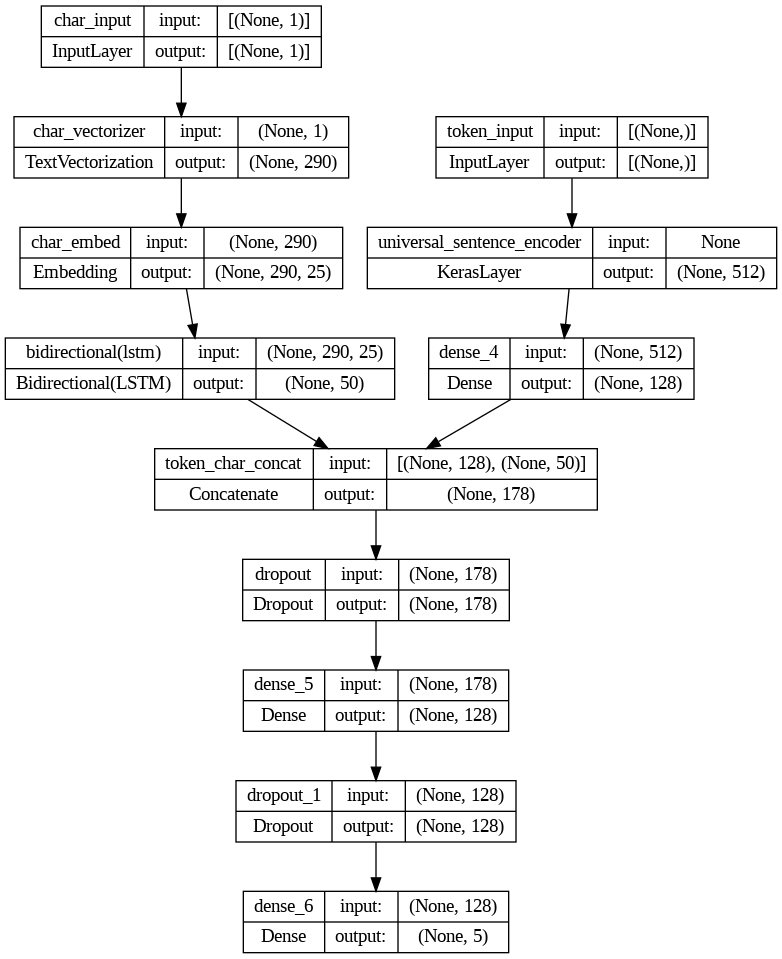

In [ ]:
#plot hybrid token and character model
from keras.utils import plot_model
plot_model(model_4,show_shapes=True)

## combining token and character data into a tf.data Dataset

In [ ]:
#combine chars and tokens into a dataset
train_char_token_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars)) #make data
train_char_token_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot) #make labels
train_char_token_dataset=tf.data.Dataset.zip((train_char_token_data,train_char_token_labels)) #combine data and labels

#prefetch and batch train data
train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars)) #make data
val_char_token_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot) #make labels
val_char_token_dataset=tf.data.Dataset.zip((val_char_token_data,val_char_token_labels)) #combine data and labels

#prefetch and batch val data
val_char_token_dataset=val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
train_char_token_dataset,val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Fitting model on token and char level sequences

In [ ]:
#fit the model on tokens and chars
history_model_4 = model_4.fit(train_char_token_dataset,
                              steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 41s 52ms/step - loss: 0.9749 - accuracy: 0.6128 - val_loss: 0.7786 - val_accuracy: 0.7038
Epoch 2/3
562/562 [==============================] - 28s 49ms/step - loss: 0.8038 - accuracy: 0.6941 - val_loss: 0.7191 - val_accuracy: 0.7244
Epoch 3/3
562/562 [==============================] - 25s 45ms/step - loss: 0.7783 - accuracy: 0.7023 - val_loss: 0.6970 - val_accuracy: 0.7344


In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 20s 21ms/step - loss: 0.6999 - accuracy: 0.7319


[0.6998858451843262, 0.7318615317344666]

In [ ]:
#make prediction using the token-character model hybrifd
model_4_pred_probs=model_4.predict(val_char_token_dataset)
model_4_pred_probs,model_4_pred_probs.shape

945/945 [==============================] - 21s 19ms/step


(array([[4.2271113e-01, 4.0710586e-01, 4.5114839e-03, 1.5957354e-01,
         6.0979836e-03],
        [3.2252017e-01, 5.4491067e-01, 3.9518001e-03, 1.2690744e-01,
         1.7099214e-03],
        [3.1480223e-01, 1.5301003e-01, 5.5668704e-02, 4.3657047e-01,
         3.9948609e-02],
        ...,
        [6.7551690e-04, 8.5801585e-03, 6.2438607e-02, 1.6627432e-04,
         9.2813945e-01],
        [7.9424148e-03, 7.3682860e-02, 1.7650642e-01, 2.5105316e-03,
         7.3935771e-01],
        [2.8256252e-01, 3.8693041e-01, 2.2855622e-01, 2.2650989e-02,
         7.9299860e-02]], dtype=float32),
 (30212, 5))

In [ ]:
#format pred probs into pred labels
model_4_preds=tf.argmax(model_4_pred_probs,axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [ ]:
#get results of token-char-hybrid-model
model_4_results=calculate_results(y_true=val_label_encoded,
                                  y_pred=model_4_preds)
model_4_results

{'accuracy': 73.18615119819938,
 'precision': 0.7333686347340553,
 'recall': 0.7318615119819939,
 'f1': 0.7292173463269198}

## Model 5 : transfer learning eith pretrained token embeddings + character embeddings + positional embeddings

> Any engineered features used to train the model needs to be availabel at the test time.

### create positinal embeddings

In [ ]:
# How many different line numbers are there
train_df['line_number'].value_counts()

,count
line_number,
0,15000
1,15000
2,15000
3,15000
4,14992
5,14949
6,14758
7,14279
8,13346


<Axes: ylabel='Frequency'>

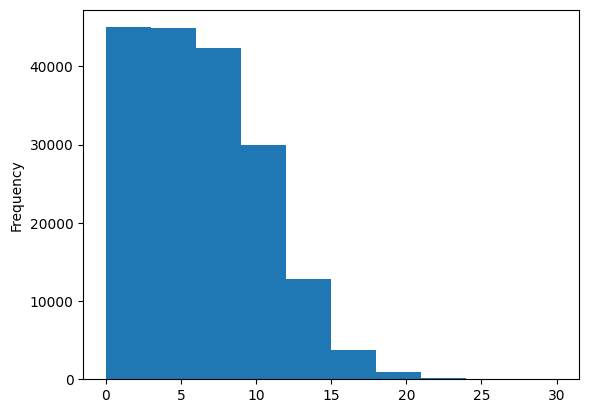

In [ ]:
#check the distribution of 'line_number' column
train_df.line_number.plot.hist()

In [ ]:
#use tensorflow to create one hot encoded tensor of our 'line_number' column
train_line_numbers_one_hot_encoded= tf.one_hot(train_df['line_number'].to_numpy(),
                                               depth=15)
val_line_numbers_one_hot_encoded= tf.one_hot(val_df['line_number'].to_numpy(),
                                               depth=15)
test_line_numbers_one_hot_encoded= tf.one_hot(test_df['line_number'].to_numpy(),
                                               depth=15)

In [ ]:
train_line_numbers_one_hot_encoded.shape,train_line_numbers_one_hot_encoded[:10]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>)

Now we encoded our line number feature, lets do the same for our total line feature...

In [ ]:
#how many different numbers of lines are there?
train_df["total_lines"].value_counts()

,count
total_lines,
11,24468
10,23639
12,22113
9,19400
13,18438
14,14610
8,12285
15,10768
7,7464


<Axes: ylabel='Frequency'>

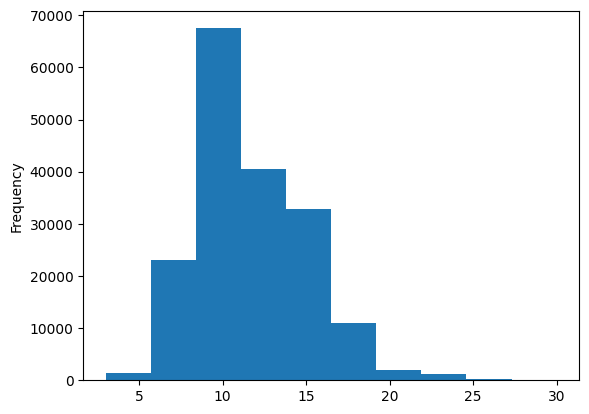

In [ ]:
# check the distribution of total line
train_df.total_lines.plot.hist()

In [ ]:
# check the coverage of a "total_lines" value of 20
np.percentile(train_df.total_lines,98)

20.0

In [ ]:
# use TensorFlow to create one-hot encoded tensors of our "total_lines" feature
train_total_lines_one_hot_encoded= tf.one_hot(train_df['total_lines'].to_numpy(),
                                               depth=20)
val_total_lines_one_hot_encoded= tf.one_hot(val_df['total_lines'].to_numpy(),
                                               depth=20)
test_total_lines_one_hot_encoded= tf.one_hot(test_df['total_lines'].to_numpy(),
                                               depth=20)
train_total_lines_one_hot_encoded[69:96],train_total_lines_one_hot_encoded.shape

(<tf.Tensor: shape=(27, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1

### Building a tribrid embedding model
1. create a token level model
2. create a char level model
3. create a positional level model "line_number" feature
4. create a model for "total-line" features
5. combine outputs of 1&2 using tf.keras.Concatenate
6. combine outputs of 3,4&5 using tf.keras.Concatenate
7. create an output layer to accept our tribrid embeddings and output label probabilities
8. combine the inputs of 1,2,3&4 and output of 7 into tf.keras.Model

In [ ]:
#1. token inputs
token_inputs=layers.Input(shape=[],dtype=tf.string,name='token_input') #tf hub layer so []
token_embeddings=tf_hub_embedding_layer(token_inputs)
token_output=layers.Dense(128,activation="relu",)(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_output)

#2. char inputs
char_inputs=layers.Input(shape=(1,),dtype=tf.string,name="char_inputs") #our own custom char embedding layer so (1,)
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bilstm=layers.Bidirectional(layers.LSTM(24))(char_embeddings) #multiples of 8 is helpful in gpu computing
char_model=tf.keras.Model(inputs=char_inputs,
                          outputs=char_bilstm)

#3. Line numbers
line_number_inputs=layers.Input(shape=(15,),dtype=tf.float32,name="line_number_inputs")
x=layers.Dense(32,activation="relu")(line_number_inputs)
line_number_model=tf.keras.Model(inputs=line_number_inputs,
                                 outputs=x)

#4. Total lines
total_lines_inputs=layers.Input(shape=(20,),dtype=tf.float32,name="total_lines_inputs")
y=layers.Dense(32,activation="relu")(total_lines_inputs)
total_lines_model=tf.keras.Model(inputs=total_lines_inputs,
                                 outputs=y)

#5. Combine token and char embeddings
combined_token_char_embeddings=layers.Concatenate(name="token_char_concat")([token_model.output,char_model.output])
z=layers.Dense(256,activation="relu")(combined_token_char_embeddings)
z=layers.Dropout(0.5)(z)

#6. Combine positional embeddings with token and char embeddings
combined_all_embeddings=layers.Concatenate(name="all_embeddings")([line_number_model.output,total_lines_model.output,z])

#7. Create output layer
output_layer=layers.Dense(num_classes,activation="softmax",name="output_layer")(combined_all_embeddings) #softmax because multi class classification problem

#8. building model
model_5=tf.keras.Model(inputs=[token_model.input,
                              char_model.input,
                              line_number_model.input,
                              total_lines_model.input],
                       outputs=output_layer,
                       name="tribrid_model_5")

In [ ]:
# get a summary
model_5.summary()

Model: "tribrid_model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_input[0]

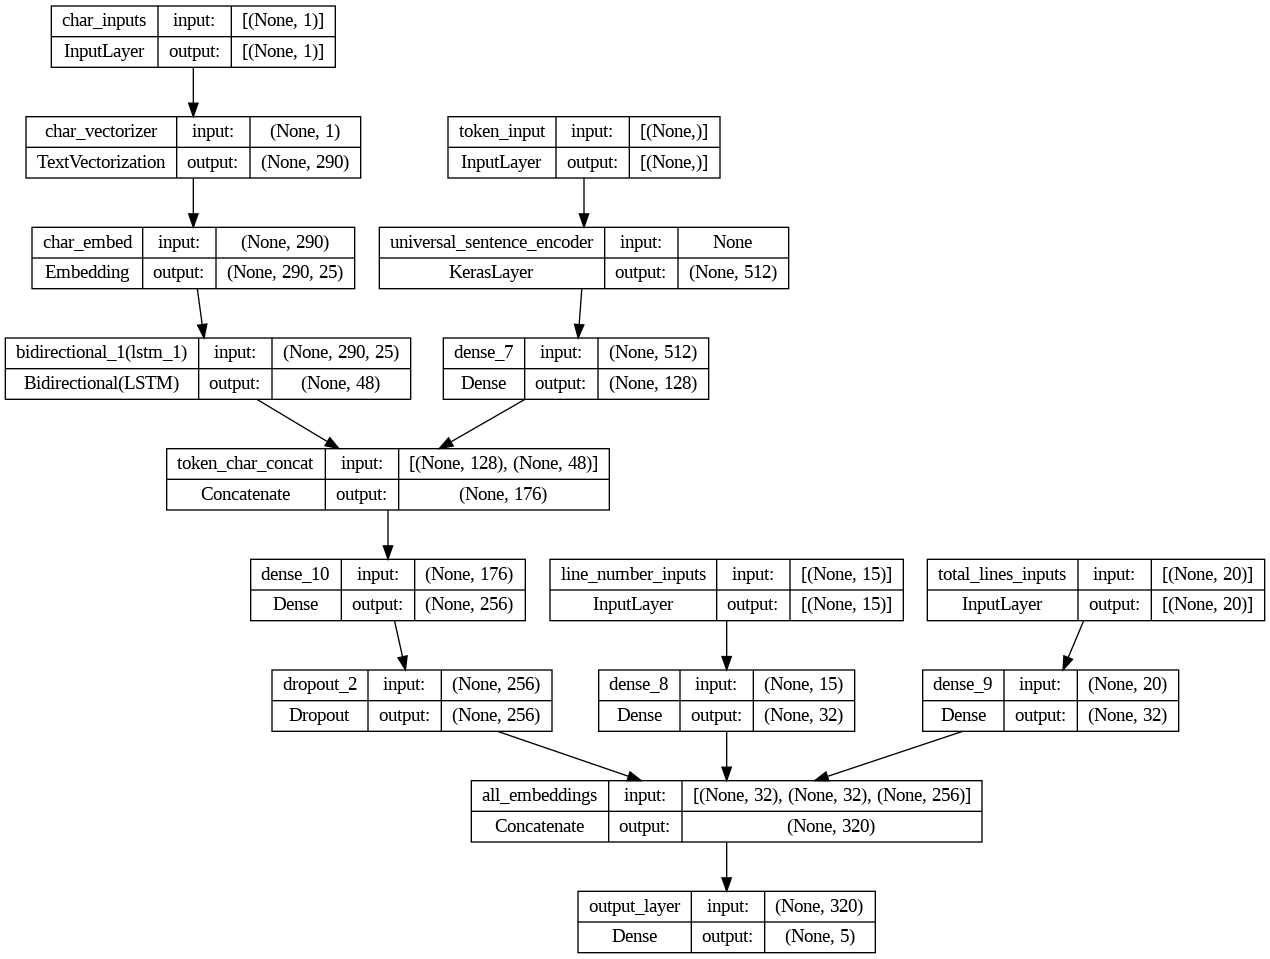

In [ ]:
from keras.utils import plot_model
plot_model(model_5,show_shapes=True)

label smoothing- if our model gets confident about a single class (pred_probs high) then it may get stuck on that class and not consider other classes results in overfitting

what label smoothing does is it assigns some values from the highest pred probs to other classes, hopefully improving generalization

In [ ]:
# compile model5
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
## creating datasets
train_token_char_pos_total_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars,train_line_numbers_one_hot_encoded,train_total_lines_one_hot_encoded))
train_token_char_pos_total_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_char_pos_total_dataset=tf.data.Dataset.zip((train_token_char_pos_total_data,train_token_char_pos_total_labels)) #combine data and labels
train_token_char_pos_total_dataset=train_token_char_pos_total_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_token_char_pos_total_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars,val_line_numbers_one_hot_encoded,val_total_lines_one_hot_encoded))
val_token_char_pos_total_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_token_char_pos_total_dataset=tf.data.Dataset.zip((val_token_char_pos_total_data,val_token_char_pos_total_labels)) #combine data and labels
val_token_char_pos_total_dataset=val_token_char_pos_total_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_token_char_pos_total_data=tf.data.Dataset.from_tensor_slices((test_sentences,test_chars,test_line_numbers_one_hot_encoded,test_total_lines_one_hot_encoded))
test_token_char_pos_total_labels=tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_token_char_pos_total_dataset=tf.data.Dataset.zip((test_token_char_pos_total_data,test_token_char_pos_total_labels)) #combine data and labels
test_token_char_pos_total_dataset=test_token_char_pos_total_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
#check input shapes
train_token_char_pos_total_dataset,val_token_char_pos_total_dataset,test_token_char_pos_total_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

# Fitting and evaluating our model

In [ ]:
history_model_5=model_5.fit(train_token_char_pos_total_dataset,
                            steps_per_epoch=int(0.15*len(train_token_char_pos_total_dataset)),
                            epochs=5,
                            validation_data=val_token_char_pos_total_dataset,
                            validation_steps=int(0.15*len(val_token_char_pos_total_dataset)))


Epoch 1/5
844/844 [==============================] - 57s 54ms/step - loss: 1.0560 - accuracy: 0.7521 - val_loss: 0.9587 - val_accuracy: 0.8227
Epoch 2/5
844/844 [==============================] - 40s 48ms/step - loss: 0.9547 - accuracy: 0.8215 - val_loss: 0.9295 - val_accuracy: 0.8411
Epoch 3/5
844/844 [==============================] - 41s 48ms/step - loss: 0.9386 - accuracy: 0.8343 - val_loss: 0.9174 - val_accuracy: 0.8464
Epoch 4/5
844/844 [==============================] - 37s 44ms/step - loss: 0.9396 - accuracy: 0.8343 - val_loss: 0.9126 - val_accuracy: 0.8475
Epoch 5/5
844/844 [==============================] - 46s 55ms/step - loss: 0.9269 - accuracy: 0.8415 - val_loss: 0.9097 - val_accuracy: 0.8533


In [ ]:
model_5.evaluate(val_token_char_pos_total_dataset)

945/945 [==============================] - 29s 30ms/step - loss: 0.9154 - accuracy: 0.8462


[0.9153538346290588, 0.8461538553237915]

In [ ]:
#make predictions with the char token pos model
model_5_pred_probs=model_5.predict(val_token_char_pos_total_dataset)
model_5_pred_probs,model_5_pred_probs.shape

945/945 [==============================] - 25s 21ms/step


(array([[0.6577107 , 0.07657261, 0.00948927, 0.2337426 , 0.02248487],
        [0.6334155 , 0.07792793, 0.06838686, 0.2046431 , 0.01562656],
        [0.43132034, 0.08405359, 0.0992912 , 0.33583757, 0.04949727],
        ...,
        [0.03149026, 0.06563684, 0.03587452, 0.0289067 , 0.8380917 ],
        [0.04949986, 0.4423325 , 0.04714475, 0.02909317, 0.43192977],
        [0.10876885, 0.7669178 , 0.04415189, 0.02949095, 0.0506705 ]],
       dtype=float32),
 (30212, 5))

In [ ]:
#format pred probs into pred labels
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 1, 1])>

In [ ]:
#get results of token-char-hybrid-model
model_5_results=calculate_results(y_true=val_label_encoded,
                                  y_pred=model_5_preds)
model_5_results

{'accuracy': 84.61538461538461,
 'precision': 0.8516319152973784,
 'recall': 0.8461538461538461,
 'f1': 0.8418751458093997}

## compare our model results

In [ ]:
all_model_results=pd.DataFrame({"baseline":baseline_results,
                               "model_1":model_1_results,
                               "model_2":model_2_results,
                               "model_3":model_3_results,
                               "model_4":model_4_results,
                               "model_5":model_5_results})
all_model_results=all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
model_1,80.338938,0.803111,0.803389,0.800137
model_2,73.699192,0.734313,0.736992,0.733568
model_3,66.811201,0.678392,0.668112,0.668684
model_4,73.186151,0.733369,0.731862,0.729217
model_5,84.615385,0.851632,0.846154,0.841875


In [ ]:
# reduce the accuracy to same scale as other metrics
all_model_results["accuracy"]=all_model_results["accuracy"]/100


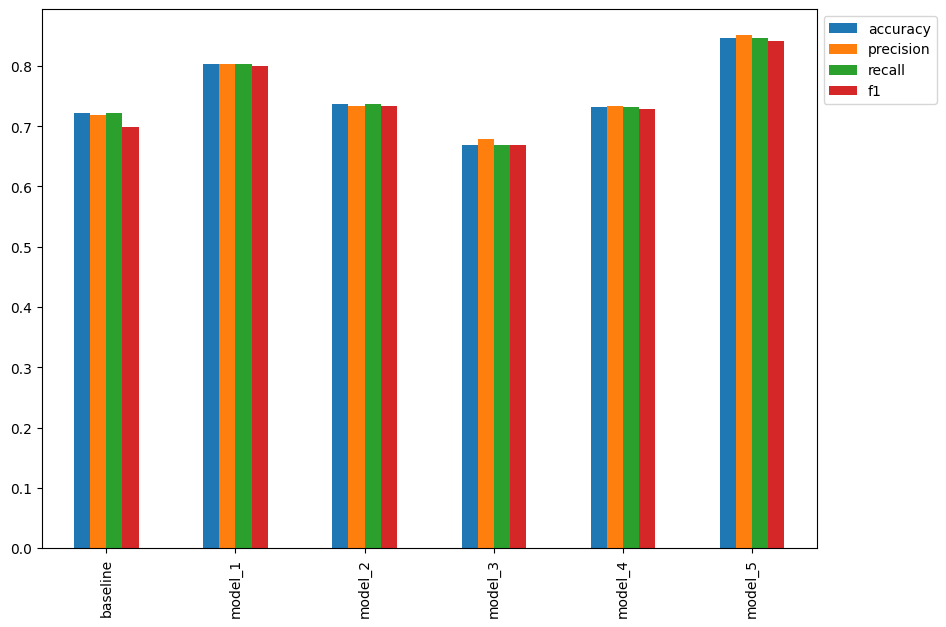

In [ ]:
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

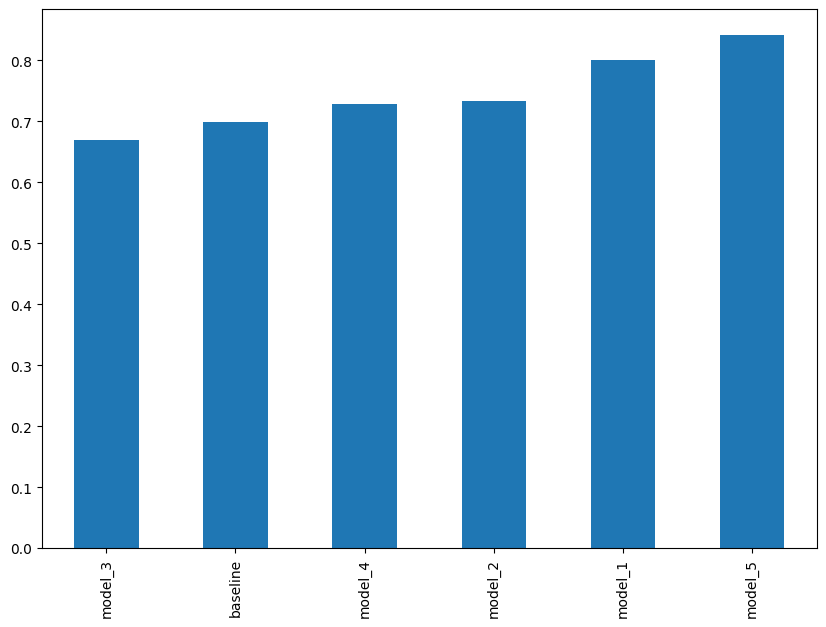

In [ ]:
#sort model results by f1 score
all_model_results.sort_values("f1",ascending=True)["f1"].plot(kind="bar",figsize=(10,7));

## save and load model


In [ ]:
model_5.save("skimlit_model_5")

In [ ]:
#load in best performing model
loaded_skimlit_model=tf.keras.models.load_model("skimlit_model_5")

In [ ]:
loaded_pred_probs=loaded_skimlit_model.predict(val_token_char_pos_total_dataset)
loaded_preds=tf.argmax(loaded_pred_probs,axis=1)
loaded_preds[:10]

945/945 [==============================] - 34s 32ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 2, 2, 4, 4, 4, 4, 1])>

In [ ]:
model_5_results

{'accuracy': 84.61538461538461,
 'precision': 0.8516319152973784,
 'recall': 0.8461538461538461,
 'f1': 0.8418751458093997}

In [ ]:
loaded_model_results=calculate_results(y_true=val_label_encoded,
                                  y_pred=loaded_preds)
loaded_model_results

{'accuracy': 84.61538461538461,
 'precision': 0.8516319152973784,
 'recall': 0.8461538461538461,
 'f1': 0.8418751458093997}

In [ ]:
model_5_results=loaded_model_results

In [ ]:
loaded_skimlit_model.summary()

Model: "tribrid_model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_input[0]

## Evaluate on test data

In [ ]:
test_pred_probs = loaded_skimlit_model.predict(test_token_char_pos_total_dataset,
                                              verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 27s 29ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 2, 2, 2, 4, 4, 4, 1, 1, 0])>

In [ ]:
# Evaluate loaded model test predictions
loaded_model_test_results = calculate_results(y_true=test_label_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 84.18450306952049,
 'precision': 0.8459795948708994,
 'recall': 0.8418450306952049,
 'f1': 0.8375743580072293}

In [ ]:
%%time
# Get list of class names of test predictions
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 15.6 s, sys: 685 ms, total: 16.2 s
Wall time: 15.8 s


['BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 '

In [ ]:
# Create prediction-enriched test dataframe
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(20)

,line_number,target,text,total_lines,prediction,pred_prob,correct
0,0,BACKGROUND,this study analyzed liver function abnormaliti...,8,BACKGROUND,0.406350,True
1,1,RESULTS,a post hoc analysis was conducted with the use...,8,METHODS,0.503405,False
2,2,RESULTS,liver function tests ( lfts ) were measured at...,8,METHODS,0.817613,False
3,3,RESULTS,survival analyses were used to assess the asso...,8,METHODS,0.828413,False
4,4,RESULTS,the percentage of patients with abnormal lfts ...,8,RESULTS,0.626577,True
5,5,RESULTS,when mean hemodynamic profiles were compared i...,8,RESULTS,0.852303,True
6,6,RESULTS,multivariable analyses revealed that patients ...,8,RESULTS,0.587259,True
7,7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,8,CONCLUSIONS,0.504952,True
8,8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,CONCLUSIONS,0.609288,True
9,0,BACKGROUND,minimally invasive endovascular aneurysm repai...,12,BACKGROUND,0.680901,True


In [ ]:
import json
# Download and open example abstracts (copy and pasted from PubMed)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

--2024-08-17 16:13:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2024-08-17 16:13:15 (67.3 MB/s) - ‘skimlit_example_abstracts.json’ saved [6737/6737]



[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [ ]:
abstracts = pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


First, we'll need to parse it using spaCy to turn it from a big chunk of text into sentences.

In [ ]:
# Create sentencizer - Source: https://spacy.io/usage/linguistic-features#sbd
from spacy.lang.en import English
nlp = English() # setup English sentence parser

# New version of spaCy
sentencizer = nlp.add_pipe("sentencizer") # create sentence splitting pipeline object

# Create "doc" of parsed sequences, change index for a different abstract
doc = nlp(example_abstracts[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [ ]:
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["line_number"] = i
  sample_dict["text"] = str(line)
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

[{'line_number': 0,
  'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'total_lines': 7},
 {'line_number': 1,
  'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'total_lines': 7},
 {'line_number': 2,
  'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'total_lines': 7},
 {'line_number': 3,
  'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'total_lines': 7},
 {'line_number': 4,
  'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'total_lines': 7},
 {'line_number': 5,
  'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'total_lines': 7},
 {'line_

In [ ]:
# Get all line_number values from sample abstract
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
# Get all total_lines values from sample abstract
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Split abstract lines into characters
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [ ]:
# Make predictions on sample abstract features
%%time
test_abstract_pred_probs = loaded_skimlit_model.predict(x=(tf.constant(abstract_lines),
                                                          tf.constant(abstract_chars),
                                                          test_abstract_line_numbers_one_hot,
                                                          test_abstract_total_lines_one_hot))
test_abstract_pred_probs

1/1 [==============================] - 4s 4s/step
CPU times: user 3.88 s, sys: 12.9 ms, total: 3.89 s
Wall time: 4.13 s


array([[0.40842208, 0.07929338, 0.0244936 , 0.44019067, 0.04760032],
       [0.07860734, 0.02211942, 0.77747345, 0.08896897, 0.03283082],
       [0.07014704, 0.02353706, 0.7859513 , 0.08211121, 0.0382533 ],
       [0.13933316, 0.20037006, 0.40784106, 0.08018795, 0.17226775],
       [0.06242833, 0.10096055, 0.3301232 , 0.04169191, 0.46479604],
       [0.03959994, 0.06652078, 0.7258577 , 0.03733116, 0.13069046],
       [0.02976846, 0.14753282, 0.06440721, 0.02204317, 0.7362483 ],
       [0.02210985, 0.12444939, 0.26644072, 0.03052048, 0.5564795 ]],
      dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction classes
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 2, 4, 4])>

In [ ]:
# Turn prediction class integers into string class names
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [ ]:
# Visualize abstract lines and predicted sequence labels
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.
